In [1]:
import sys
sys.path.append('../scripts')

In [2]:
import experimenting
import event_library as el
import torch
from matplotlib import pyplot as plt
from experimenting.utils.visualization import plot_skeleton_2d, plot_skeleton_3d
from experimenting.utils.skeleton_helpers import Skeleton
import numpy as np
from experimenting.dataset.factory import Joints3DConstructor
import experimenting.utils.visualization as viz
import experimenting
from experimenting.utils import utilities

C:\Users\miracleyoo\Anaconda3\envs\dvs_pose\lib\site-packages\matplotlib_inline\config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [3]:
hw = el.utils.get_hw_property('dvs')

In [4]:
# Wrapper for Events-H3m
# h3mcore = experimenting.dataset.HumanCore('test', '/data/gscarpellini/dataset/human3.6m/constant_count', '/data/gscarpellini/dataset/human3.6m/constant_count/gt.npz', 'cross-view', 1, test_cams=[1, 3], test_subjects=[6, 7])

In [32]:
# Wrapper for DHP19
# dhpcore = experimenting.dataset.DHP19Core('test', base_path='/data/gscarpellini/dhp19/time_count_dataset', data_dir='/data/gscarpellini/dhp19/time_count_dataset/movements_per_frame', joints_dir='/data/gscarpellini/dhp19/time_count_dataset/labels_full_joints', hm_dir="",  labels_dir="", preload_dir="", n_joints=13, n_classes=33, partition='cross-subject', n_channels=1, cams=[1, 3], movements=None, test_subjects=[6, 7])
dhpcore = experimenting.dataset.DHP19Core('test', base_path=r'D:\Dataset\DVS\dhp19\time_count_dataset', data_dir=r'D:\Dataset\DVS\dhp19\time_count_dataset\frames', joints_dir=r'D:\Dataset\DVS\dhp19\time_count_dataset\labels', hm_dir="",  labels_dir="", preload_dir="", n_joints=13, n_classes=33, partition='cross-subject', n_channels=1, cams=[1, 3], movements=None, test_subjects=[3,4])


In [6]:
# Example using H3m

In [10]:
# idx = 10
# print(h3mcore.frames_info[idx+1])
# sk, intr, extr = h3mcore.get_joint_from_id(idx)
# frame = h3mcore.get_frame_from_id(idx)
# joints = sk.get_2d_points(260, 346, intrinsic_matrix=intr, extrinsic_matrix=extr)
# plot_skeleton_3d(sk)
# plot_skeleton_2d(frame.squeeze(), joints)

## Evaluate a model 


### H3m


In [7]:
path = "/home/gianscarpe/dev/event-based-monocular-hpe/h3m_constantcount/exps_MargiposeEstimator/cross-view/03-18-08-22_exp_resnet50_pretrained_True/checkpoints"
model = utilities.load_model(path, "MargiposeEstimator", core=h3mcore).double()

Loading training
Loading from ...  /home/gianscarpe/dev/event-based-monocular-hpe/h3m_constantcount/exps_MargiposeEstimator/cross-view/03-18-08-22_exp_resnet50_pretrained_True/checkpoints/epoch=46-val_loss=0.04.ckpt


In [ ]:
factory = Joints3DConstructor()
factory.set_dataset_core(h3mcore)
train, val, test = factory.get_datasets({'apply':{}}, {'apply':{}})

In [8]:
loader = iter(torch.utils.data.DataLoader(test, batch_size=1, shuffle=True))

No handles with labels found to put in legend.


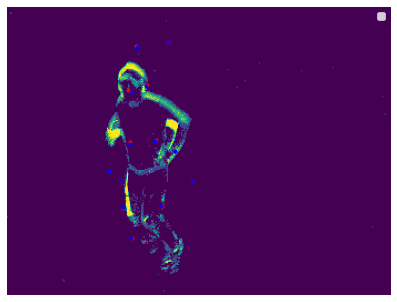

In [71]:
viz.plot_skeleton_2d(b_x[0].squeeze(),b_y['2d_joints'][0], pred_sk.get_2d_points(260, 346, extrinsic_matrix=b_y['M'][0], intrinsic_matrix=b_y['camera'][0]))

### DHP19


In [33]:
# path = "/home/gianscarpe/dev/event-based-monocular-hpe/timecount_dhp19/exps_MargiposeEstimator/cross-subject/03-20-08-54_exp_resnet50_pretrained_True_stages_3/checkpoints/"
path = r'D:\Dataset\DVS\dhp19\pretrained_model\dhp19_constantcount\checkpoints'
model = utilities.load_model(path, "MargiposeEstimator", core=dhpcore).eval().double().cuda()

Loading training
Loading from ...  D:\Dataset\DVS\dhp19\pretrained_model\dhp19_constantcount\checkpoints\epoch=19-val_loss=0.09.ckpt


In [34]:
factory = Joints3DConstructor()
factory.set_dataset_core(dhpcore)
train, val, test = factory.get_datasets({'apply':{}}, {'apply':{}})

In [45]:
np.random.seed(100)
loader = iter(torch.utils.data.DataLoader(val, batch_size=1, shuffle=True))

In [46]:
# for i in range(1000):
b_x, b_y = next(loader)

In [50]:
# print(b_y['M'])
# print(b_y['camera'])
# print(b_y['z_ref'])
# print(b_y['mask'])
# print(b_y['skeleton'])
# print(b_y['normalized_skeleton'])
# print(b_y['2d_joints'])

bykeys = b_y.keys()
print(f'Keys: {bykeys}')

for k in bykeys:
    print(f'{k}: {b_y[k]}\n')


Keys: dict_keys(['xyz', 'skeleton', 'normalized_skeleton', 'z_ref', '2d_joints', 'M', 'camera', 'mask'])
xyz: tensor([[[   5.4881, -460.3651, 1930.2375],
         [-199.0724, -265.8681, 1701.3992],
         [ 149.6619, -229.5603, 1705.9440],
         [-283.8966, -150.0900, 1399.7340],
         [ 254.1665, -223.8910, 1349.9075],
         [-130.2336, -380.0354, 1189.9995],
         [ 110.4661, -359.7754, 1206.5951],
         [-340.1531, -375.0940, 1150.6442],
         [ 230.5491, -544.9155, 1312.4452],
         [-124.0047, -376.3557,  712.4835],
         [  79.6868, -367.8016,  707.1934],
         [-161.1870, -344.1095,   74.9439],
         [ 126.2818, -384.4052,   96.4709]]], dtype=torch.float64)

skeleton: tensor([[[ 407.7645, -855.4892, 2857.4792],
         [ 433.5334, -719.9788, 3193.6547],
         [ 142.8764, -673.7885, 3003.0254],
         [ 415.8332, -475.1717, 3420.2773],
         [  48.9636, -317.6891, 3048.7303],
         [ 439.3690, -192.2097, 3220.6417],
         [ 242.2134,

In [43]:
counter=0
def plot_next(loader):
    b_x, b_y = next(loader)
    sk_label = Skeleton(b_y['xyz'][0])
    preds, outs = model(b_x.permute(0, -1, 1, 2).cuda())
    preds = preds.cpu()
    pred_sk = Skeleton(preds[0].detach().numpy()).denormalize(260, 346, camera=b_y['camera'][0], z_ref=b_y['z_ref'][0]).reproject_onto_world(b_y['M'][0])
    plot_skeleton_3d(sk_label, pred_sk)
    gt_joints = torch.stack([b_y['2d_joints'][0][:, 0], b_y['2d_joints'][0][:, 1]], 1)
    pred_joints = pred_sk.get_2d_points(260, 346, extrinsic_matrix=b_y['M'][0], intrinsic_matrix=b_y['camera'][0])
    plt.savefig(f'results/3D/{counter}.png')
    plt.close('all')

    pred_joints = np.stack([pred_joints[:, 0], pred_joints[:, 1]], 1)
    plot_skeleton_2d(b_x[0].squeeze(), gt_joints, pred_joints)
    plt.savefig(f'results/2D/{counter}.png')
    
    # plt.cla()
    plt.close('all')
    return sk_label, pred_sk

In [44]:
# sk_label, pred_sk = plot_next(loader=loader)
for i in range(100):
    plot_next(loader=loader)
    counter += 1

e:\GitHub\lifting_events_to_3d_hpe\notebooks\../scripts\experimenting\utils\visualization.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
No handles with labels found to put in legend.
e:\GitHub\lifting_events_to_3d_hpe\notebooks\../scripts\experimenting\utils\visualization.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
No hand

In [12]:
print(sk_label.left_elbow_point, pred_sk.left_elbow_point)

tensor([ 3.5152e+02, -1.0418e+02,  1.2075e+03,  1.0000e+00],
       dtype=torch.float64) tensor([ 5.2115e+02, -1.4651e+02,  1.4198e+03,  1.0000e+00],
       dtype=torch.float64)


e:\GitHub\lifting_events_to_3d_hpe\notebooks\../scripts\experimenting\utils\visualization.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
No handles with labels found to put in legend.


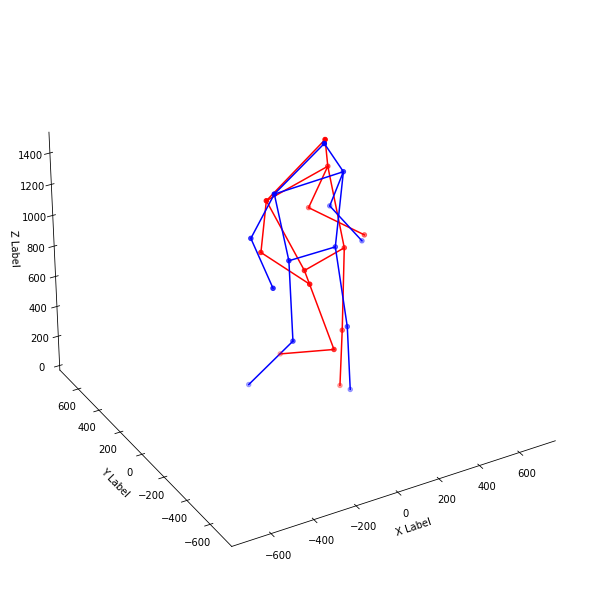

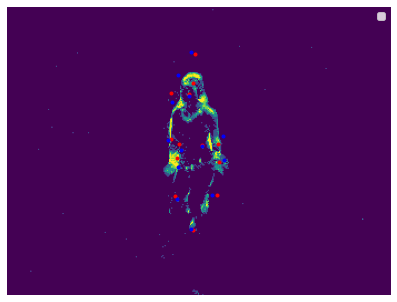

In [54]:
b_x, b_y = next(loader)
preds, outs = model(b_x.permute(0, -1, 1, 2).cuda())
preds = preds.cpu()
pred_sk = Skeleton(preds[0].detach().numpy()).denormalize(260, 346, camera=b_y['camera'][0], z_ref=b_y['z_ref'][0]).reproject_onto_world(b_y['M'][0])
plot_skeleton_3d(Skeleton(b_y['xyz'][0]), pred_sk)
gt_joints = torch.stack([b_y['2d_joints'][0][:, 0], b_y['2d_joints'][0][:, 1]], 1)
pred_joints = pred_sk.get_2d_points(260, 346, extrinsic_matrix=b_y['M'][0], intrinsic_matrix=b_y['camera'][0])

pred_joints = np.stack([pred_joints[:, 0], pred_joints[:, 1]], 1)
plot_skeleton_2d(b_x[0].squeeze(), gt_joints, pred_joints)

In [60]:
lb = np.load(r'J:\datasets\DVS\dhp19\time_count_dataset\labels\S10_session_1_mov_1_frame_10_cam_1_2dhm.npz')
print(list(lb.keys()))

['xyz', 'M', 'camera']


In [62]:
lb.get('camera')

array([[-316.81646441,   -4.96433508,  185.50450752,    0.        ],
       [  -0.        , -319.14908052,   93.22181153,    0.        ],
       [   0.        ,    0.        ,    1.        ,    0.        ]])

In [63]:
lb.get('M')

array([[-8.21604577e-02,  9.96564506e-01, -1.04328364e-02,
         3.88271340e+02],
       [-4.77458338e-01, -3.01703939e-02,  8.78136255e-01,
        -6.80531960e+02],
       [ 8.74804661e-01,  7.71293213e-02,  4.78296847e-01,
        -2.93054028e+03]])

In [28]:
lb.get('xyz')

array([[ -40.74964523, -225.6829834 ,  122.54750061, -264.86437988,
         190.12931824, -166.5912323 ,   96.4475174 , -280.66555786,
         265.08459473, -222.85574341,  114.57054901, -259.88586426,
         181.70509338],
       [  55.15184021,  108.48353577,  104.22634888,  175.11917114,
         183.21621704,  -22.85309601,   -8.24820614,  -17.0972023 ,
          25.52164841,   11.23552895,   24.20362663,  -75.02854156,
         -54.44061661],
       [1900.53442383, 1582.62695312, 1565.50585938, 1222.76257324,
        1238.0723877 , 1063.42016602, 1046.03308105,  904.17816162,
         902.73834229,  544.91339111,  554.31347656,   86.18963623,
          86.2082901 ]])

In [55]:
gt_joints

tensor([[167., 201.],
        [151., 170.],
        [189., 169.],
        [153., 136.],
        [191., 140.],
        [155., 123.],
        [175., 124.],
        [147., 119.],
        [190., 123.],
        [147.,  77.],
        [164.,  78.],
        [167.,  68.],
        [169.,  42.]], dtype=torch.float64)

In [16]:
fms = np.load(r'J:\datasets\DVS\dhp19\time_count_dataset\frames\S10_session_1_mov_2_frame_11_cam_2.npy')
print(fms.shape)

(260, 346)


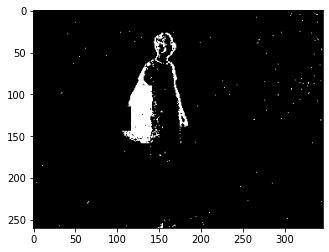

In [29]:
from mlib import mcv
mcv.imshow(fms, multiply=255)

In [27]:
set(fms.flatten().tolist())

{0.0, 33.0, 66.0, 99.0, 133.0, 166.0, 199.0, 233.0, 255.0}